# Bayesian Network - pgmpy library package 

Problem:
Objective: 

In [2]:
from pgmpy.estimators import HillClimbSearch, MaximumLikelihoodEstimator, BicScore
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD

from feature_engine import discretisation as dsc

import pandas as pd 
import seaborn as sns
import numpy as np 
import networkx as nx
import pylab as plt
import time

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [3]:
df= pd.read_csv("pen_parametric_LPQ.csv")

In [4]:
df.head()

,pen_id,param_ky,part_ts,reclaim_ct,vchar_param_vl,int_param_vl,dbl_param_vl,param_nm,param_dn,datatag_cd,...,equip_type_ky,equip_type_nm,process_ky,process_nm,last_reclaim_fg,source_db_insert_ts,db_data_source_cd,insert_ts,update_ts,sort_key_dt
0,6671555000708336,44201,2023-07-05 11:32:18.000,1,NaN,NaN,2.541982,[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht],FoamHeight,F_Ht,...,13718,TIJ2X R1 22 FOAM MONO,2443,FOAM INSERT MONO,Y,2023-07-05 11:32:26.040,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
1,6671555000708336,44306,2023-07-05 11:34:44.000,1,NaN,2322.0,NaN,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWPMax],Power,R_HWPMax,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.240,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
2,6671555000708336,44307,2023-07-05 11:34:44.000,1,NaN,76.0,NaN,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWAmpl],Amplitude,R_HWAmpl,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.240,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
3,6671555000708336,44305,2023-07-05 11:34:44.000,1,NaN,NaN,0.135000,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWWeldTm],Welding Time,R_HWWeldTm,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.240,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
4,6671555000708336,44308,2023-07-05 11:34:44.000,1,NaN,162.0,NaN,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWEnergy],Energy,R_HWEnergy,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.257,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13981 entries, 0 to 13980
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pen_id               13981 non-null  int64  
 1   param_ky             13981 non-null  int64  
 2   part_ts              13981 non-null  object 
 3   reclaim_ct           13981 non-null  int64  
 4   vchar_param_vl       306 non-null    object 
 5   int_param_vl         10534 non-null  float64
 6   dbl_param_vl         3135 non-null   float64
 7   param_nm             13981 non-null  object 
 8   param_dn             13981 non-null  object 
 9   datatag_cd           13981 non-null  object 
 10  datatype_cd          13981 non-null  object 
 11  equip_ky             13981 non-null  int64  
 12  equip_nm             13981 non-null  object 
 13  line_nm              13981 non-null  object 
 14  equip_type_ky        13981 non-null  int64  
 15  equip_type_nm        13981 non-null 

# Data Pre-processing

In [6]:
df.fillna(0, inplace= True)

In [7]:
df['dbl_param_vl'] = df['int_param_vl'] + df['dbl_param_vl'].apply(lambda x: round(x,3))
df['dbl_param_vl'] = df['dbl_param_vl'].astype(str) + df['vchar_param_vl'].astype(str)

In [8]:
df.head()

,pen_id,param_ky,part_ts,reclaim_ct,vchar_param_vl,int_param_vl,dbl_param_vl,param_nm,param_dn,datatag_cd,...,equip_type_ky,equip_type_nm,process_ky,process_nm,last_reclaim_fg,source_db_insert_ts,db_data_source_cd,insert_ts,update_ts,sort_key_dt
0,6671555000708336,44201,2023-07-05 11:32:18.000,1,0,0.0,2.5420,[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht],FoamHeight,F_Ht,...,13718,TIJ2X R1 22 FOAM MONO,2443,FOAM INSERT MONO,Y,2023-07-05 11:32:26.040,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
1,6671555000708336,44306,2023-07-05 11:34:44.000,1,0,2322.0,2322.00,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWPMax],Power,R_HWPMax,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.240,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
2,6671555000708336,44307,2023-07-05 11:34:44.000,1,0,76.0,76.00,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWAmpl],Amplitude,R_HWAmpl,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.240,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
3,6671555000708336,44305,2023-07-05 11:34:44.000,1,0,0.0,0.1350,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWWeldTm],Welding Time,R_HWWeldTm,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.240,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05
4,6671555000708336,44308,2023-07-05 11:34:44.000,1,0,162.0,162.00,[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWEnergy],Energy,R_HWEnergy,...,13727,TIJ2X R1 22 LID WELD LONG,313,Lid,Y,2023-07-05 11:34:56.257,MAGMA5,2023-07-05 14:13:56.456,2023-07-05 14:13:56.456,2023-07-05


In [9]:
unique_lists_1 = df['param_nm'].unique().tolist()

In [10]:
unique_lists_2 = df['process_nm'].unique().tolist()

In [11]:
unique_lists_1

['[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]',
 '[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWPMax]',
 '[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWAmpl]',
 '[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWWeldTm]',
 '[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWEnergy]',
 '[Lid]-[TIJ2X R1 22 LID WELD LONG]-[R_HWDepth]',
 '[Filter]-[TIJ2X R1 22 FILTER MONO]-[TStkTemp]',
 '[Filter]-[TIJ2X R1 22 FILTER MONO]-[TStkForce]',
 '[Filter]-[TIJ2X R1 22 FILTER MONO]-[TStkTime]',
 '[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[nozzle_ID]',
 '[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[Heat_bank]',
 '[IHA ADHESIVE CURE]-[TIJ2X R1 22 IHA CURE PALLETS]-[Heat_Temp]',
 '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[FW903Z]',
 '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[FW906X]',
 '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZInspRes]',
 '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZInspFail]',
 '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZD1AvgHt]',
 '

In [12]:
unique_lists_2

['FOAM INSERT MONO',
 'Lid',
 'Filter',
 'IHA ADHESIVE CURE',
 'IHA FLEX INSPECT TEST',
 'ADHESIVE DISPENSE',
 'SMART BASE IHA ATTACH',
 'WET PEN ETEST',
 'Ink Fill',
 'Image Quality Test',
 'Tape',
 'INK WEIGHT CPM',
 'Bubble Test']

In [13]:
df.to_csv('pen_parametric_LPQ_processed.csv',index= True)

In [14]:
transposed_df = df.pivot_table(index='pen_id',columns='param_nm',values='dbl_param_vl', aggfunc='first')

In [15]:
transposed_df

param_nm,[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[CycleTime],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Disp_RT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[DspPattern],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Last_WT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Pressure],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[StartDly],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[WT_Time],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[CycleTime],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Disp_RT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[DspPattern],...,[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[Tentline2Y],[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[YMBlobNoz],[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[YMBlobNtw],[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[YMBlobStw],[WET PEN ETEST]-[TIJ2X R1 22 ETEST A]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST B]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST C]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST D]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST E]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST E]-[UID]
pen_id,,,,,,,,,,,,,,,,,,,,,
6671555000708058,2366.00,0.0060,8.00,0.0560,45.00,0.00,15.00,3361.00,0.0060,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.0196457136B783E
6671555000708081,2367.00,0.0060,8.00,0.0560,44.90,0.00,15.00,3352.00,0.0060,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.01CDB6A4AB31B8D
6671555000708084,2330.00,0.0040,8.00,0.0590,41.90,0.00,15.00,3370.00,0.0050,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.039A4DED16A6E82
6671555000708095,2365.00,0.0060,8.00,0.0560,45.00,0.00,15.00,3355.00,0.0060,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.019293A5D9C87C8
6671555000708097,2367.00,0.0060,8.00,0.0560,45.00,0.00,15.00,3367.00,0.0060,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.02F79FB422D0C57
6671555000708116,2358.00,0.0060,8.00,0.0560,44.90,0.00,15.00,3368.00,0.0060,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.037CFD342C1FCEF
6671555000708132,2363.00,0.0060,8.00,0.0560,45.00,0.00,15.00,3367.00,0.0060,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.0093ABACE1DBC3F
6671555000708149,2323.00,0.0040,8.00,0.0590,42.00,0.00,15.00,3367.00,0.0050,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.03767693405C5E1
6671555000708157,2049.00,0.0060,8.00,0.10,52.00,30.00,15.00,3073.00,0.0060,7.00,...,0.00,0.00,0.00,0.00,577.00,8513.00,17.00,235.00,23877.00,0.031D5F55864FAEC


In [16]:
transposed_df.to_csv('transposed_LPQ.csv')

In [17]:
df_transposed = pd.read_csv('transposed_LPQ.csv')

In [18]:
df_transposed

,pen_id,[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[CycleTime],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Disp_RT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[DspPattern],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Last_WT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Pressure],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[StartDly],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[WT_Time],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[CycleTime],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Disp_RT],...,[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[Tentline2Y],[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[YMBlobNoz],[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[YMBlobNtw],[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[YMBlobStw],[WET PEN ETEST]-[TIJ2X R1 22 ETEST A]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST B]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST C]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST D]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST E]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST E]-[UID]
0,6671555000708058,2366.0,0.006,8.0,0.056,45.0,0.0,15.0,3361.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.0196457136B783E
1,6671555000708081,2367.0,0.006,8.0,0.056,44.9,0.0,15.0,3352.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.01CDB6A4AB31B8D
2,6671555000708084,2330.0,0.004,8.0,0.059,41.9,0.0,15.0,3370.0,0.005,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.039A4DED16A6E82
3,6671555000708095,2365.0,0.006,8.0,0.056,45.0,0.0,15.0,3355.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.019293A5D9C87C8
4,6671555000708097,2367.0,0.006,8.0,0.056,45.0,0.0,15.0,3367.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.02F79FB422D0C57
5,6671555000708116,2358.0,0.006,8.0,0.056,44.9,0.0,15.0,3368.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.037CFD342C1FCEF
6,6671555000708132,2363.0,0.006,8.0,0.056,45.0,0.0,15.0,3367.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.0093ABACE1DBC3F
7,6671555000708149,2323.0,0.004,8.0,0.059,42.0,0.0,15.0,3367.0,0.005,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.03767693405C5E1
8,6671555000708157,2049.0,0.006,8.0,0.100,52.0,30.0,15.0,3073.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.031D5F55864FAEC
9,6671555000708162,2369.0,0.006,8.0,0.056,44.9,0.0,15.0,3366.0,0.006,...,0.0,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.03C2A1DD51048FD


In [19]:
df_transposed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 347 entries, pen_id to [WET PEN ETEST]-[TIJ2X R1 22 ETEST E]-[UID]
dtypes: float64(335), int64(1), object(11)
memory usage: 114.0+ KB


In [20]:
df_CPM = pd.read_csv('LPQ_CPM.csv')

In [21]:
df_CPM

,pen_id,Status
0,6671555000708241,Deprime
1,6671555000708191,Pass
2,6671555000708058,Pass
3,6671555000708116,Pass
4,6671555000708095,Pass
5,6671555000708202,Pass
6,6671555000708324,Pass
7,6671555000708306,Pass
8,6671555000708260,Pass
9,6671555000708305,Pass


In [22]:
df_merged = pd.merge(df_transposed, df_CPM, on='pen_id', how ='inner')

In [23]:
df_merged

,pen_id,[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[CycleTime],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Disp_RT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[DspPattern],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Last_WT],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Pressure],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[StartDly],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[WT_Time],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[CycleTime],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Disp_RT],...,[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[YMBlobNoz],[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[YMBlobNtw],[Tape]-[TIJ2X R1 22 TAPE INSPECT]-[YMBlobStw],[WET PEN ETEST]-[TIJ2X R1 22 ETEST A]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST B]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST C]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST D]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST E]-[TaskResult],[WET PEN ETEST]-[TIJ2X R1 22 ETEST E]-[UID],Status
0,6671555000708058,2366.0,0.006,8.0,0.056,45.0,0.0,15.0,3361.0,0.006,...,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.0196457136B783E,Pass
1,6671555000708081,2367.0,0.006,8.0,0.056,44.9,0.0,15.0,3352.0,0.006,...,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.01CDB6A4AB31B8D,Pass
2,6671555000708084,2330.0,0.004,8.0,0.059,41.9,0.0,15.0,3370.0,0.005,...,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.039A4DED16A6E82,Pass
3,6671555000708095,2365.0,0.006,8.0,0.056,45.0,0.0,15.0,3355.0,0.006,...,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.019293A5D9C87C8,Pass
4,6671555000708097,2367.0,0.006,8.0,0.056,45.0,0.0,15.0,3367.0,0.006,...,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.02F79FB422D0C57,Pass
5,6671555000708116,2358.0,0.006,8.0,0.056,44.9,0.0,15.0,3368.0,0.006,...,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.037CFD342C1FCEF,Pass
6,6671555000708132,2363.0,0.006,8.0,0.056,45.0,0.0,15.0,3367.0,0.006,...,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.0093ABACE1DBC3F,Pass
7,6671555000708149,2323.0,0.004,8.0,0.059,42.0,0.0,15.0,3367.0,0.005,...,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.03767693405C5E1,Pass
8,6671555000708157,2049.0,0.006,8.0,0.100,52.0,30.0,15.0,3073.0,0.006,...,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.031D5F55864FAEC,Pass
9,6671555000708162,2369.0,0.006,8.0,0.056,44.9,0.0,15.0,3366.0,0.006,...,0.0,0.0,0.0,577.0,8513.0,17.0,235.0,23877.0,0.03C2A1DD51048FD,Pass


In [24]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(df_merged.isnull().sum())

pen_id                                                                    0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[CycleTime]               0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Disp_RT]                 0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[DspPattern]              0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Last_WT]                 0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Pressure]                0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[StartDly]                0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[WT_Time]                 0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[CycleTime]               0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Disp_RT]                 0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[DspPattern]              0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Last_WT]                 0
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Pressure]                0
[ADHESIVE DI

In [25]:
display(df_merged.nunique())

pen_id                                                                   42
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[CycleTime]              33
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Disp_RT]                 3
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[DspPattern]              1
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Last_WT]                 3
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[Pressure]                6
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[StartDly]                3
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP FULL]-[WT_Time]                 1
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[CycleTime]              37
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Disp_RT]                 3
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[DspPattern]              1
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Last_WT]                 4
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH DISP SEMI]-[Pressure]                7
[ADHESIVE DI

- Remove rows with missing value 
- Remove nunique <=3, doesn't provide any valuable insight  

Critical parameter Z1 - missing data filter staking 
[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht] 


Critical parameter Z2
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMAvgHt]
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol]
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt]
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi]


Critical parameter Z3
[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt] 
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas] 
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]

In [26]:
columns_to_include = [
    "[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]",
    "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]",
    "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMAvgHt]",
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol]",
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt]",
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi]",
    "[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]",
    "Status"
]

df_selected = df_merged[columns_to_include]

In [27]:
df_selected = df_selected.dropna(axis=1)
df_selected = df_selected[(df_selected !=0).all(axis=1)]

In [28]:
df_selected 

,[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht],[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt],[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMAvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi],[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP],Status
0,2.527,2220.0,2261.0,7619.0,554.0,920.0,61.62,2.462,1.886,3.980,Pass
1,2.762,2255.0,2290.0,7018.0,527.0,892.0,61.80,2.574,1.899,4.077,Pass
2,1.883,2239.0,2277.0,8524.0,594.0,961.0,61.76,2.487,1.896,4.050,Pass
3,2.435,2232.0,2277.0,8257.0,573.0,965.0,61.78,2.512,1.867,4.003,Pass
4,2.334,2235.0,2289.0,7985.0,557.0,943.0,61.65,2.537,1.880,4.200,Pass
5,2.577,2252.0,2281.0,7414.0,542.0,912.0,61.76,2.477,1.855,4.050,Pass
6,3.058,2240.0,2286.0,7242.0,543.0,885.0,61.54,2.515,1.871,4.077,Pass
7,2.510,2233.0,2278.0,8365.0,584.0,963.0,61.85,2.477,1.855,4.032,Pass
8,2.674,2264.0,2310.0,7678.0,571.0,943.0,61.83,2.531,1.883,3.997,Pass
9,2.724,2265.0,2295.0,7456.0,547.0,910.0,61.91,2.515,1.849,4.043,Pass


In [29]:
unique_counts = df_selected.drop('Status',axis=1).nunique()

columns_to_drop = unique_counts[unique_counts <=3].index.tolist()
if 'Status' in columns_to_drop:
    columns_to_drop.remove('Status')

df_merged_filtered = df_selected.drop(columns=columns_to_drop)

In [30]:
df_merged_filtered

,[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht],[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt],[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMAvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi],[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP],Status
0,2.527,2220.0,2261.0,7619.0,554.0,920.0,61.62,2.462,1.886,3.980,Pass
1,2.762,2255.0,2290.0,7018.0,527.0,892.0,61.80,2.574,1.899,4.077,Pass
2,1.883,2239.0,2277.0,8524.0,594.0,961.0,61.76,2.487,1.896,4.050,Pass
3,2.435,2232.0,2277.0,8257.0,573.0,965.0,61.78,2.512,1.867,4.003,Pass
4,2.334,2235.0,2289.0,7985.0,557.0,943.0,61.65,2.537,1.880,4.200,Pass
5,2.577,2252.0,2281.0,7414.0,542.0,912.0,61.76,2.477,1.855,4.050,Pass
6,3.058,2240.0,2286.0,7242.0,543.0,885.0,61.54,2.515,1.871,4.077,Pass
7,2.510,2233.0,2278.0,8365.0,584.0,963.0,61.85,2.477,1.855,4.032,Pass
8,2.674,2264.0,2310.0,7678.0,571.0,943.0,61.83,2.531,1.883,3.997,Pass
9,2.724,2265.0,2295.0,7456.0,547.0,910.0,61.91,2.515,1.849,4.043,Pass


In [31]:
df_merged_filtered.nunique()

[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]                    41
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]      34
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMAvgHt]    32
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol]               41
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt]             29
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi]             31
[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt]            28
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas]                        30
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]                        27
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]                        38
Status                                                                2
dtype: int64

In [32]:
keywords_to_remove = ['TAPE', 'SMART', 'ETEST','pen_ID','VENT','Image']

# Get columns containing any of the keywords
columns_to_drop = df_merged_filtered.columns[df_merged_filtered.columns.str.contains('|'.join(keywords_to_remove), case=False)]

# Drop the selected columns from the DataFrame
df_featured = df_merged_filtered.drop(columns=columns_to_drop)

df_featured_reset = df_featured.reset_index(drop=True)
# Display the updated DataFrame
print(df_featured_reset)


    [Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]  \
0                                               2.527   
1                                               2.762   
2                                               1.883   
3                                               2.435   
4                                               2.334   
5                                               2.577   
6                                               3.058   
7                                               2.510   
8                                               2.674   
9                                               2.724   
10                                              1.808   
11                                              2.349   
12                                              2.569   
13                                              2.381   
14                                              2.289   
15                                              2.389   
16                             

- Feature importance - foam, filter, adhesive, ink fill, ink weight 

- Foam height 
- Filter - unknown - filter bubble test + input parameter 
- Adhesive dispense - fluidic beads (inkfeed slot) 
- Vision inspect - POM Z height after the IHA attached 
- Inkfill - vacuum delta
- Ink weight - CPM 

In [33]:
df_featured_reset.to_csv('feature_selected.csv')

# Exploratory Data Analysis (EDA)

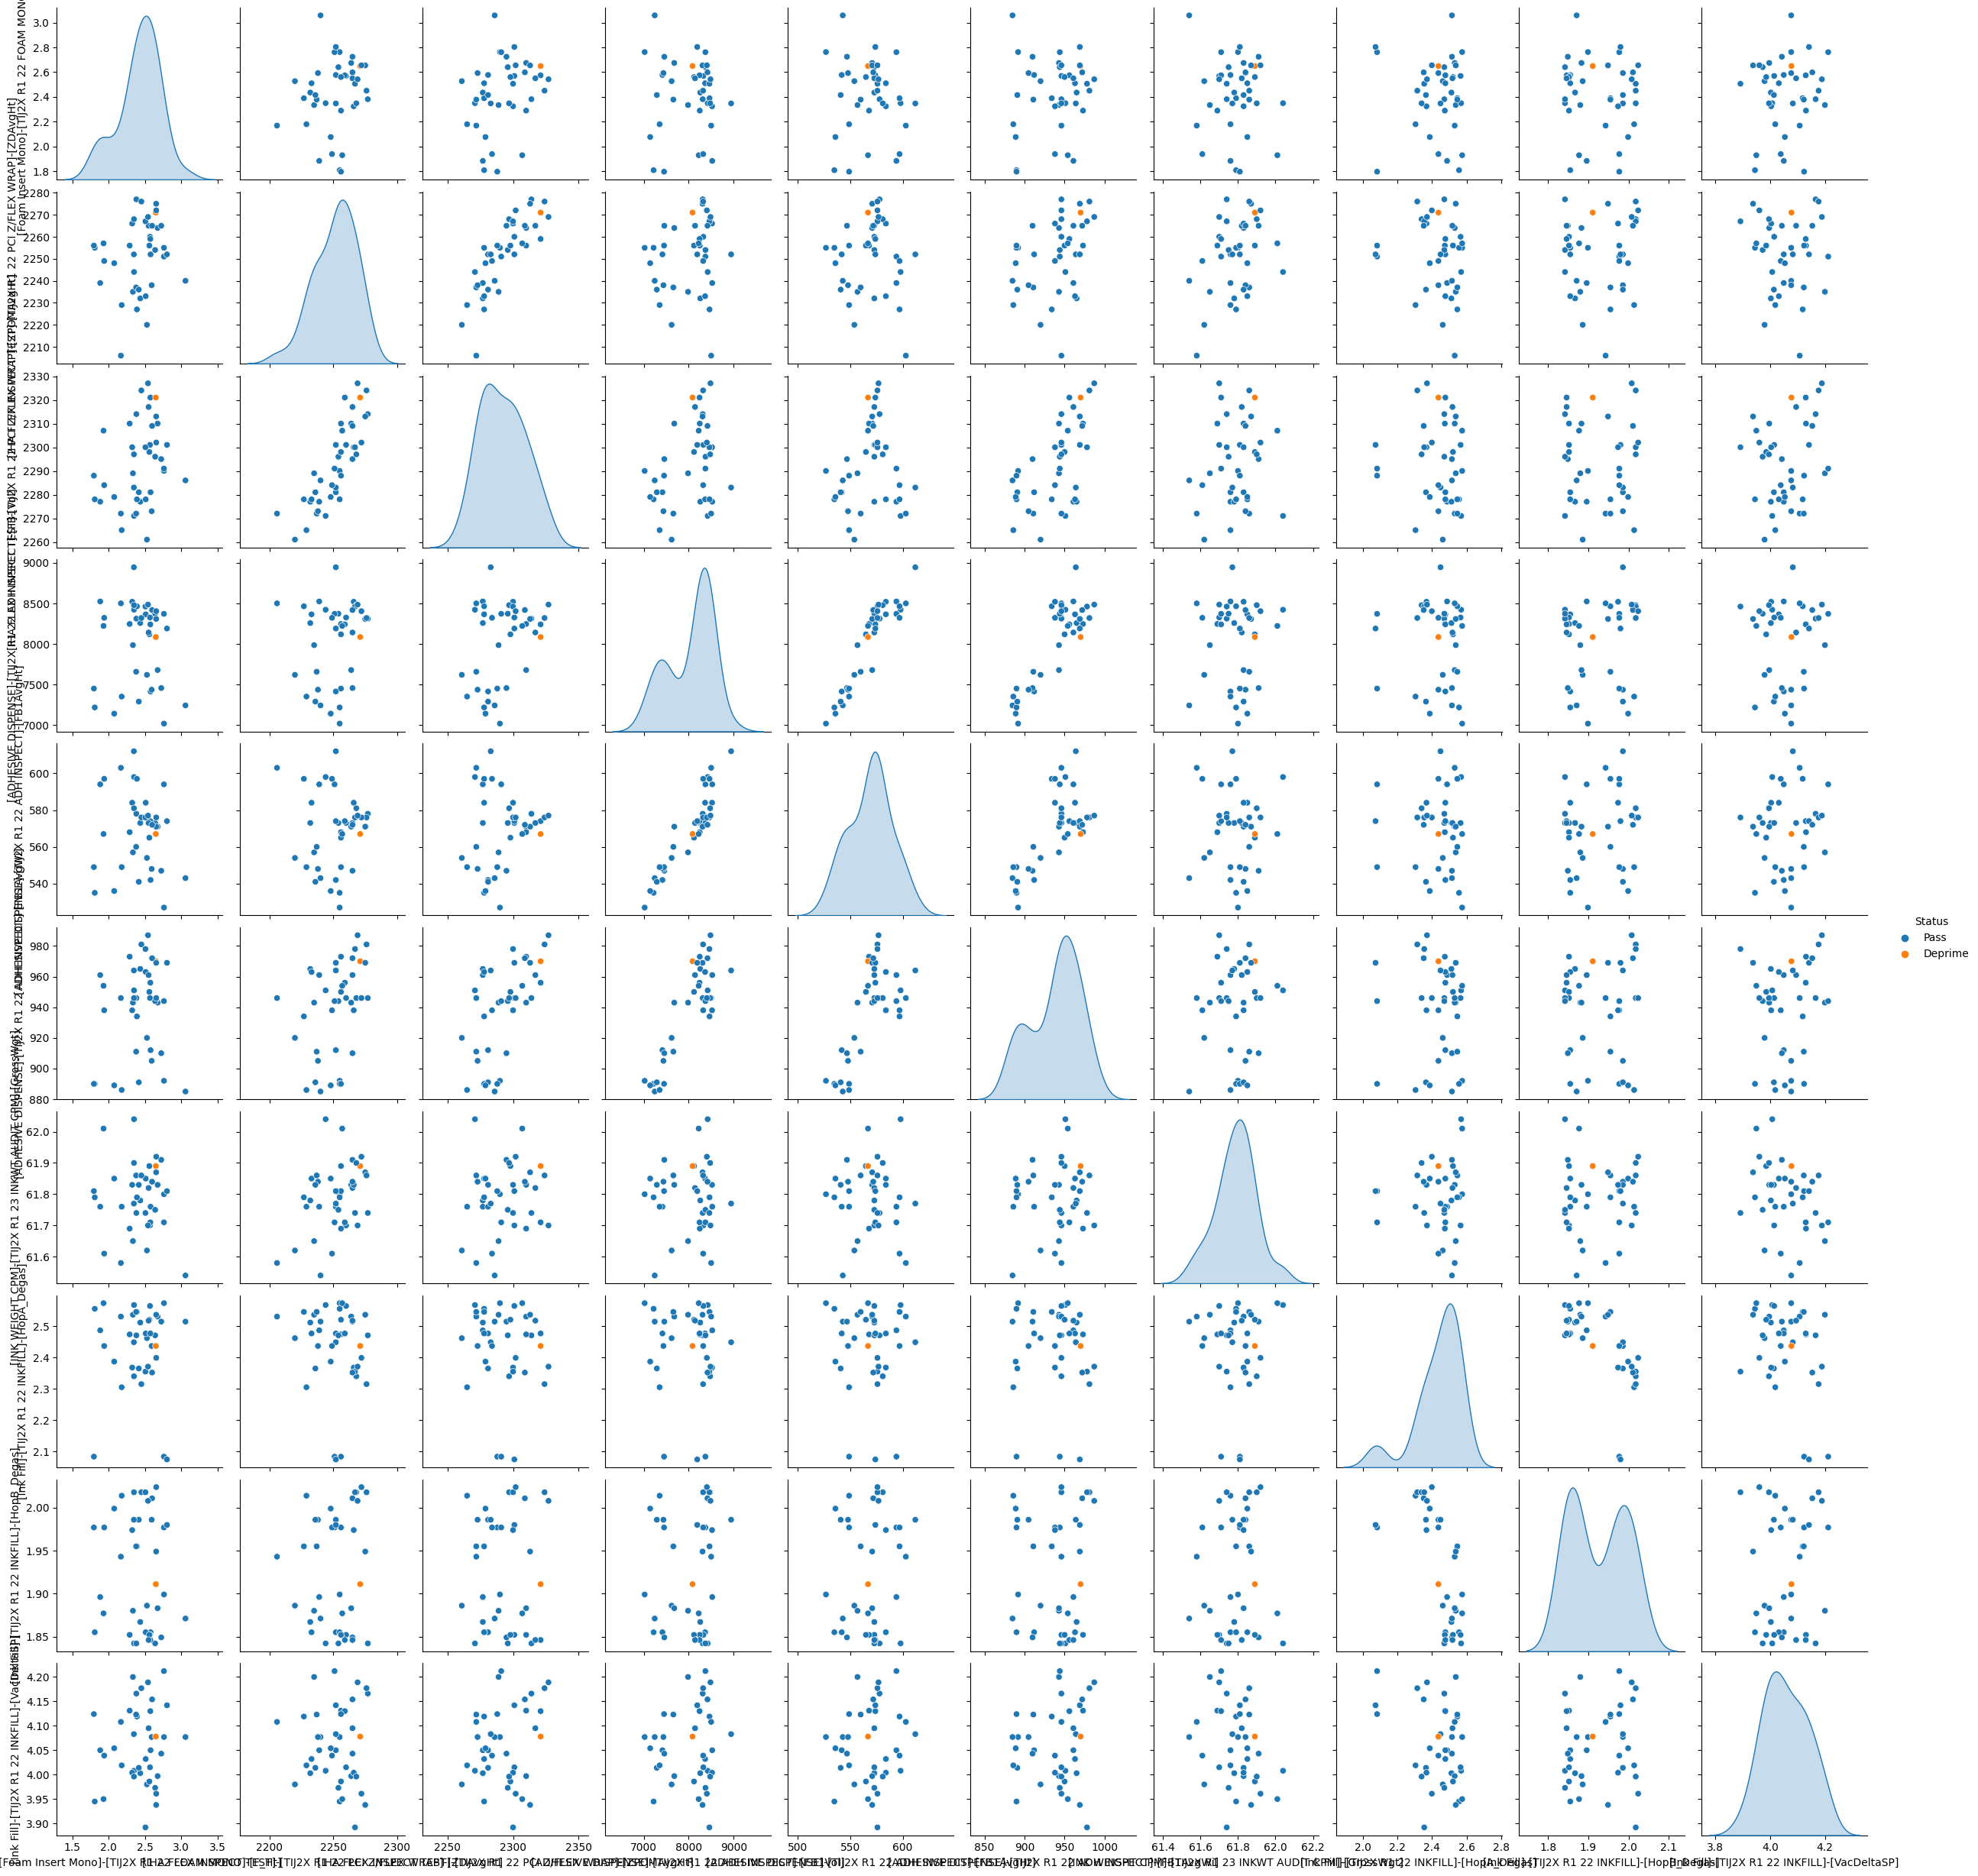

In [174]:
#pairplot
sns.pairplot(df_featured_reset, hue='Status')
plt.show()

# Bayesian Network Modelling 

In [34]:
col_list = []
for col in df_featured_reset.columns:
    print(col, ": ", len(df_featured_reset[col].unique()))
    if(len(df_featured_reset[col].unique()) > 5):
        col_list.append(col)

[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht] :  41
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt] :  34
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMAvgHt] :  32
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol] :  41
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt] :  29
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi] :  31
[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt] :  28
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas] :  30
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas] :  27
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP] :  38
Status :  2


In [35]:
num_bins = 3
disc = dsc.EqualFrequencyDiscretiser(q=num_bins, variables=col_list)
df_binned = disc.fit(df_featured_reset[col_list])
equalfrequency_discretizer_dict = disc.binner_dict_
bin_df_equalfrequency = pd.DataFrame.from_dict(equalfrequency_discretizer_dict, orient = 'index')  

In [36]:
bin_df_equalfrequency

,0,1,2,3
[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht],-inf,2.358667,2.572333,inf
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt],-inf,2248.333333,2259.666667,inf
[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMAvgHt],-inf,2281.666667,2300.666667,inf
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol],-inf,8018.333333,8352.000000,inf
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt],-inf,565.666667,576.000000,inf
[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi],-inf,938.000000,955.333333,inf
[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt],-inf,61.760000,61.836667,inf
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas],-inf,2.437000,2.515000,inf
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas],-inf,1.873000,1.977000,inf
[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP],-inf,4.014333,4.091000,inf


In [37]:
df_featured_reset.describe()

,[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht],[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt],[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMAvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi],[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,2.431732,2251.902439,2293.097561,8043.195122,569.170732,939.487805,61.790488,2.439000,1.924707,4.058805
std,0.281939,16.385672,17.336097,492.135714,20.048569,29.989266,0.105545,0.127081,0.066341,0.078885
min,1.796000,2206.000000,2261.000000,7018.000000,527.000000,885.000000,61.540000,2.074000,1.842000,3.892000
25%,2.334000,2239.000000,2278.000000,7619.000000,554.000000,912.000000,61.740000,2.371000,1.855000,4.003000
50%,2.506000,2255.000000,2291.000000,8246.000000,573.000000,946.000000,61.800000,2.474000,1.911000,4.050000
75%,2.598000,2265.000000,2307.000000,8404.000000,578.000000,963.000000,61.850000,2.531000,1.986000,4.123000
max,3.058000,2277.000000,2327.000000,8945.000000,612.000000,987.000000,62.040000,2.574000,2.024000,4.212000


# Discretization 
pd.cut to make the final dataframe cleaner to understand the range of values 

In [38]:
a=["1.796 to 2.368333","2.368333 to 2.570667","2.570667 to 3.058"]
b=["2206 to 2248.666667","2248.666667 to 2259.333333","2259.333333 to 2277"]
c=["2261 to 2282.333333","2282.333333 to 2300.333333","2300.333333 to 2327"]
d=["7018 to 7882.666667","7882.666667 to 8339","8339 to 8945"]
e=["527 to 563.333333","563.333333 to 576","576 to 612"]
f=["885 to 936.666667","936.666667 to 954.666667","954.666667 to 987"]
g=["61.54 to 61.756667","61.756667 to 61.833333","61.833333 to 62.04"]
h=["2.074 to 2.424333","2.424333 to 2.515","2.515 to 2.574"]
i=["1.842 to 1.875","1.875 to 1.977","1.977 to 2.024"]
j=["3.892 to 4.0146674","4.0146674 to 4.099333","4.099333 to 4.285"]


In [39]:
columns_and_labels = {
    "[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]": a,
    "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]": b,
    "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMAvgHt]": c,
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol]": d,
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt]": e,
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi]": f,
    "[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt]": g,
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas]": h,
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]": i,
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]": j
}

num_bins = 3

In [40]:
for column, labels in columns_and_labels.items():
    df_featured_reset[column] = pd.cut(df_featured_reset[column], num_bins, labels=labels)


In [41]:
df_featured_reset 

,[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht],[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt],[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMAvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi],[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP],Status
0,2.368333 to 2.570667,2206 to 2248.666667,2261 to 2282.333333,7018 to 7882.666667,527 to 563.333333,936.666667 to 954.666667,61.54 to 61.756667,2.515 to 2.574,1.842 to 1.875,3.892 to 4.0146674,Pass
1,2.570667 to 3.058,2259.333333 to 2277,2282.333333 to 2300.333333,7018 to 7882.666667,527 to 563.333333,885 to 936.666667,61.756667 to 61.833333,2.515 to 2.574,1.842 to 1.875,4.0146674 to 4.099333,Pass
2,1.796 to 2.368333,2248.666667 to 2259.333333,2261 to 2282.333333,8339 to 8945,576 to 612,954.666667 to 987,61.756667 to 61.833333,2.515 to 2.574,1.842 to 1.875,4.0146674 to 4.099333,Pass
3,2.368333 to 2.570667,2248.666667 to 2259.333333,2261 to 2282.333333,7882.666667 to 8339,563.333333 to 576,954.666667 to 987,61.756667 to 61.833333,2.515 to 2.574,1.842 to 1.875,4.0146674 to 4.099333,Pass
4,2.368333 to 2.570667,2248.666667 to 2259.333333,2282.333333 to 2300.333333,7882.666667 to 8339,563.333333 to 576,936.666667 to 954.666667,61.54 to 61.756667,2.515 to 2.574,1.842 to 1.875,4.099333 to 4.285,Pass
5,2.368333 to 2.570667,2248.666667 to 2259.333333,2261 to 2282.333333,7018 to 7882.666667,527 to 563.333333,885 to 936.666667,61.756667 to 61.833333,2.515 to 2.574,1.842 to 1.875,4.0146674 to 4.099333,Pass
6,2.570667 to 3.058,2248.666667 to 2259.333333,2282.333333 to 2300.333333,7018 to 7882.666667,527 to 563.333333,885 to 936.666667,61.54 to 61.756667,2.515 to 2.574,1.842 to 1.875,4.0146674 to 4.099333,Pass
7,2.368333 to 2.570667,2248.666667 to 2259.333333,2261 to 2282.333333,8339 to 8945,576 to 612,954.666667 to 987,61.756667 to 61.833333,2.515 to 2.574,1.842 to 1.875,4.0146674 to 4.099333,Pass
8,2.570667 to 3.058,2259.333333 to 2277,2300.333333 to 2327,7882.666667 to 8339,563.333333 to 576,936.666667 to 954.666667,61.756667 to 61.833333,2.515 to 2.574,1.842 to 1.875,3.892 to 4.0146674,Pass
9,2.570667 to 3.058,2259.333333 to 2277,2282.333333 to 2300.333333,7018 to 7882.666667,527 to 563.333333,885 to 936.666667,61.833333 to 62.04,2.515 to 2.574,1.842 to 1.875,4.0146674 to 4.099333,Pass


# Edges Construction 

In [42]:
columns_to_include_1 = ["[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]",
    "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]",
    "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMAvgHt]",
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol]",
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt]",
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi]",
    "[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]",
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]"]

In [66]:
edges= [
    ("[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]", "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]"),
    ("[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]","Status"),
    ("[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol]", "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]"),
    ("[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt]", "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]"),
    ("[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi]", "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]"),
    ("[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]", "Status"),
    ("[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]", "Status")
]

In [67]:
hc = HillClimbSearch(df_featured_reset)
best_model = hc.estimate(scoring_method=BicScore(df_featured_reset))  # Specify the scoring method here

# Add the target variable to the model
target_variable = "Status"  # Replace with the actual name of your target variable
#edges = list(best_model.edges())

model = BayesianModel(edges)

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [68]:
print("Nodes in the graph:", model.nodes())
print("Edges in the graph:", model.edges())

Nodes in the graph: ['[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]', '[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]', 'Status', '[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol]', '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]', '[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt]', '[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi]', '[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]']
Edges in the graph: [('[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]', '[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]'), ('[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]', 'Status'), ('[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol]', '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]'), ('[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]', 'Status'), ('[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt]', '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]'), ('[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1

In [69]:
nx_graph = nx.DiGraph()
nx_graph.add_edges_from(edges)

<Figure size 1000x800 with 0 Axes>

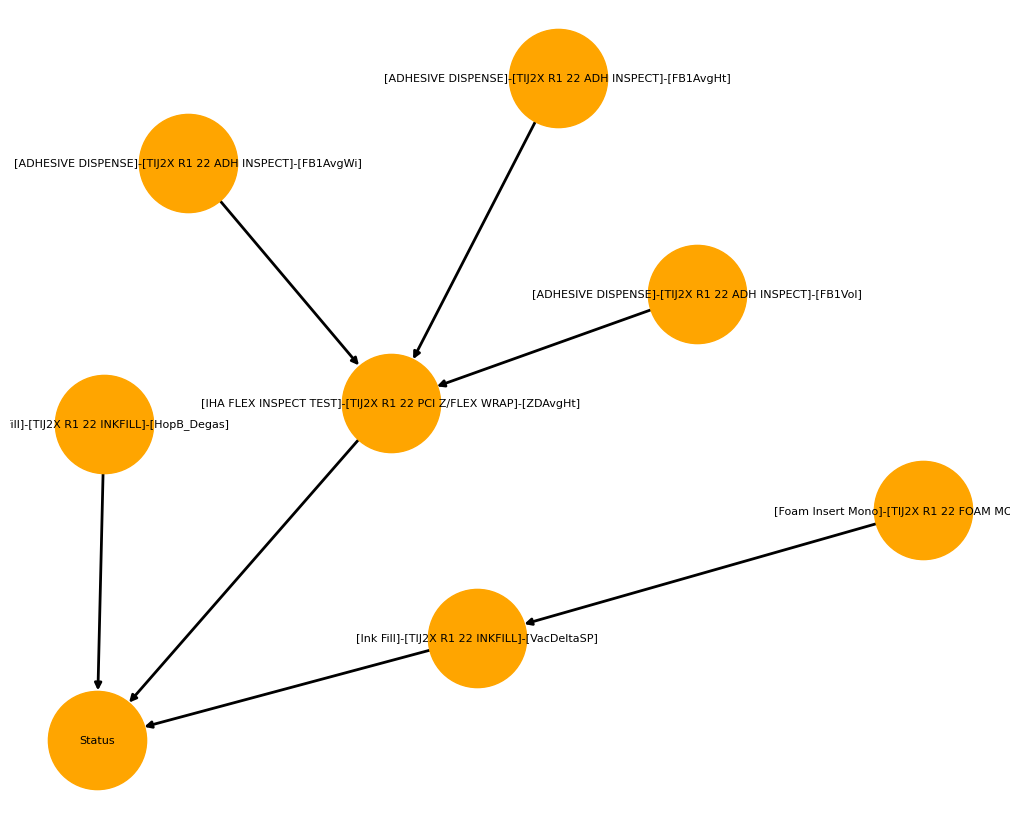

In [191]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos=pos, with_labels=True, node_size=5000, node_color="orange", width=2, font_size=8)
plt.show()

In [70]:
model.get_children(target_variable)

[]

In [71]:
model.get_parents(target_variable)

['[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]',
 '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]',
 '[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]']

In [72]:
#listing all independencies 
model.get_independencies()

([IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt] ⟂ [Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas], [Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht], [Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP])
([IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt] ⟂ [Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht], [Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP] | [Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas])
([IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt] ⟂ [Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas], [Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht], [Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP] | [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi])
([IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt] ⟂ [Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas], [Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht], [Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP] | [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol])
([IHA FLEX INSPECT TEST]-[TIJ2X R1 

# Exact Inference

In [238]:
# Fitting the data to the model using Maximum Likelihood Estimator
model.fit(df_featured_reset, estimator=MaximumLikelihoodEstimator)


In [239]:
# Doing exact inference using Variable Elimination
infer_exact = VariableElimination(model)

In [240]:
#CPT visualization for each variable
for cpd in model.get_cpds():
    print('CPT of {}'.format(cpd.variable))
    print(cpd, '\n')

CPT of [Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]
+-------------------------------------------------------------------------+----------+
| [Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht](1.796 to 2.368333)    | 0.195122 |
+-------------------------------------------------------------------------+----------+
| [Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht](2.368333 to 2.570667) | 0.560976 |
+-------------------------------------------------------------------------+----------+
| [Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht](2.570667 to 3.058)    | 0.243902 |
+-------------------------------------------------------------------------+----------+ 

CPT of [Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+ 

CPT of Status
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+ 

CPT of [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol]
+--------------------------------------

In [241]:
# Filter the data to include only rows where Status is 'Deprime'
deprime_data = df_featured_reset[df_featured_reset['Status'] == 'Deprime']

# Get the list of all variables in your model except the target variable
all_variables_except_target = [var for var in model.nodes if var != 'Status']

# Perform MAP inference for each variable against 'Status' = 'Deprime'
map_values = {}
for variable in all_variables_except_target:
    map_value = infer_exact.map_query(variables=[variable], evidence={'Status': 'Deprime'})
    map_values[variable] = map_value[variable]

# Print the MAP values for each variable against 'Status' = 'Deprime'
# Maximum a posteriori (MAP) learning selects a single most likely hypothesis given the data. 
# The hypothesis prior is still used and the method is often more tractable than full Bayesian learning.
for variable, value in map_values.items():
    print(f"MAP value for {variable}: {value}")


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

MAP value for [Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]: 2.368333 to 2.570667
MAP value for [Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]: 4.0146674 to 4.099333
MAP value for [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol]: 8339 to 8945
MAP value for [IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]: 2206 to 2248.666667
MAP value for [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt]: 563.333333 to 576
MAP value for [ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi]: 936.666667 to 954.666667
MAP value for [Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]: 1.842 to 1.875


In [242]:
model.check_model()

True

# Joint Distribution

In [243]:
joint_distribution = infer_exact.query(variables=[target_variable], joint=True)

In [244]:
print(joint_distribution)

+-----------------+---------------+
| Status          |   phi(Status) |
+=================+===============+
| Status(Deprime) |        0.1588 |
+-----------------+---------------+
| Status(Pass)    |        0.8412 |
+-----------------+---------------+


# Conditional Probability Distribution 

##### References 
columns_and_labels = {
    "[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht]": a,
    "[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]": b,
    *"[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMAvgHt]": c,
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol]": d,
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt]": e,
    "[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi]": f,
    *"[INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt]": g,
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopA_Degas]": h,
    "[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]": k,
    *"[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]": j
}

num_bins = 3
####

In [245]:
print(infer_exact.query(variables = ['[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]'], 
                        evidence= {"Status": 'Deprime'}))

+----------------------------------------------------------------------+------------------------------------------------------+
| [Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]                        |   phi([Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]) |
+======================================================================+======================================================+
| [Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP](3.892 to 4.0146674)    |                                               0.3414 |
+----------------------------------------------------------------------+------------------------------------------------------+
| [Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP](4.0146674 to 4.099333) |                                               0.4003 |
+----------------------------------------------------------------------+------------------------------------------------------+
| [Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP](4.099333 to 4.285)     |                                

In [246]:
print(infer_exact.query(variables = ['[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]'], 
                        evidence= {"Status": 'Deprime'}))

+---------------------------------------------------------------------------------------------+------------------------------------------------------------------------+
| [IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]                             |   phi([IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]) |
+=============================================================================================+========================================================================+
| [IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt](2206 to 2248.666667)        |                                                                 0.4930 |
+---------------------------------------------------------------------------------------------+------------------------------------------------------------------------+
| [IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt](2248.666667 to 2259.333333) |                                                            

In [247]:
print(infer_exact.query(variables = ['[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]'], 
                        evidence= {"Status": 'Deprime'}))

+---------------------------------------------------------------+------------------------------------------------------+
| [Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]                 |   phi([Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]) |
+===============================================================+======================================================+
| [Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas](1.842 to 1.875) |                                               0.3927 |
+---------------------------------------------------------------+------------------------------------------------------+
| [Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas](1.875 to 1.977) |                                               0.3490 |
+---------------------------------------------------------------+------------------------------------------------------+
| [Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas](1.977 to 2.024) |                                               0.2582 |
+-------------------------------

In [83]:
list_range = j
for i in list_range:
    print(i)
    print(infer_exact.query(variables=[target_variable], evidence = {'[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]': i}))

3.892 to 4.0146674
+-----------------+---------------+
| Status          |   phi(Status) |
+=================+===============+
| Status(Deprime) |        0.2223 |
+-----------------+---------------+
| Status(Pass)    |        0.7777 |
+-----------------+---------------+
4.0146674 to 4.099333
+-----------------+---------------+
| Status          |   phi(Status) |
+=================+===============+
| Status(Deprime) |        0.1448 |
+-----------------+---------------+
| Status(Pass)    |        0.8552 |
+-----------------+---------------+
4.099333 to 4.285
+-----------------+---------------+
| Status          |   phi(Status) |
+=================+===============+
| Status(Deprime) |        0.1294 |
+-----------------+---------------+
| Status(Pass)    |        0.8706 |
+-----------------+---------------+


In [84]:
list_range = b
for i in list_range:
    print(i)
    print(infer_exact.query(variables=[target_variable], evidence = {'[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]': i}))

2206 to 2248.666667
+-----------------+---------------+
| Status          |   phi(Status) |
+=================+===============+
| Status(Deprime) |        0.3355 |
+-----------------+---------------+
| Status(Pass)    |        0.6645 |
+-----------------+---------------+
2248.666667 to 2259.333333
+-----------------+---------------+
| Status          |   phi(Status) |
+=================+===============+
| Status(Deprime) |        0.1487 |
+-----------------+---------------+
| Status(Pass)    |        0.8513 |
+-----------------+---------------+
2259.333333 to 2277
+-----------------+---------------+
| Status          |   phi(Status) |
+=================+===============+
| Status(Deprime) |        0.0729 |
+-----------------+---------------+
| Status(Pass)    |        0.9271 |
+-----------------+---------------+


Exact inference to find P(Status |[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZPOMAvgHt] = 2300.333333 to 2327, [INK WEIGHT CPM]-[TIJ2X R1 23 INKWT AUDIT CPM]-[GrossWgt] = 61.833333 to 62.04, [Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP] = 3.892 to 4.0146674)

Picking the highest deprime probability given the evidences --> 
VacDelta = Medium 
ZDAvgHt = Low 
HopB_Degas = Low 

Picking the lowest deprime probability given the evidences --> 
VacDelta = High 
ZDAvgHt = High 
HopB_Degas = High 

In [248]:
print(infer_exact.query(variables=[target_variable], evidence={'[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]': '4.0146674 to 4.099333', 
                                                        '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]': '2206 to 2248.666667',
                                                        '[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]': '1.842 to 1.875'}))

+-----------------+---------------+
| Status          |   phi(Status) |
+=================+===============+
| Status(Deprime) |        0.5000 |
+-----------------+---------------+
| Status(Pass)    |        0.5000 |
+-----------------+---------------+


In [139]:
##print(infer_exact.query(variables=[target_variable], evidence={'[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]': '4.099333 to 4.285', 
                                                        
                                                        '[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]': '1.977 to 2.024'}))

IndentationError: unexpected indent (3297563416.py, line 3)

# Approximate Inference 

In [252]:
from pgmpy.inference import ApproxInference

In [253]:
infer_approx = ApproxInference(model)

In [254]:
print(infer_approx.query(variables = [target_variable], n_samples = 4_0, seed = 42))

  0%|          | 0/8 [00:00<?, ?it/s]

+-----------------+---------------+
| Status          |   phi(Status) |
+=================+===============+
| Status(Deprime) |        0.2000 |
+-----------------+---------------+
| Status(Pass)    |        0.8000 |
+-----------------+---------------+


In [255]:
print(infer_approx.query(variables=[target_variable], evidence={'[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]': '4.0146674 to 4.099333', 
                                                        '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]': '2206 to 2248.666667',
                                                        '[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]': '1.842 to 1.875'},
                                                        n_samples = 4_0, seed = 42))

  0%|          | 0/40 [00:00<?, ?it/s]

+-----------------+---------------+
| Status          |   phi(Status) |
+=================+===============+
| Status(Deprime) |        0.4750 |
+-----------------+---------------+
| Status(Pass)    |        0.5250 |
+-----------------+---------------+


# Using Rejection Sampling

In [256]:
from pgmpy.sampling import BayesianModelSampling

In [257]:
infer_rejection = BayesianModelSampling(model)

In [258]:
infer_rejection.rejection_sample(show_progress=False, size =4_0, seed = 42)

  0%|          | 0/8 [00:00<?, ?it/s]

,[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP],Status,[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol],[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]
0,2.368333 to 2.570667,4.099333 to 4.285,Pass,7018 to 7882.666667,2259.333333 to 2277,576 to 612,954.666667 to 987,1.842 to 1.875
1,2.570667 to 3.058,4.0146674 to 4.099333,Pass,7882.666667 to 8339,2259.333333 to 2277,563.333333 to 576,954.666667 to 987,1.977 to 2.024
2,2.368333 to 2.570667,3.892 to 4.0146674,Deprime,7018 to 7882.666667,2248.666667 to 2259.333333,563.333333 to 576,936.666667 to 954.666667,1.977 to 2.024
3,2.368333 to 2.570667,3.892 to 4.0146674,Deprime,8339 to 8945,2206 to 2248.666667,527 to 563.333333,885 to 936.666667,1.875 to 1.977
4,1.796 to 2.368333,4.0146674 to 4.099333,Pass,7018 to 7882.666667,2248.666667 to 2259.333333,563.333333 to 576,885 to 936.666667,1.842 to 1.875
5,1.796 to 2.368333,3.892 to 4.0146674,Pass,8339 to 8945,2259.333333 to 2277,563.333333 to 576,936.666667 to 954.666667,1.977 to 2.024
6,1.796 to 2.368333,4.0146674 to 4.099333,Pass,7882.666667 to 8339,2259.333333 to 2277,563.333333 to 576,954.666667 to 987,1.842 to 1.875
7,2.570667 to 3.058,4.0146674 to 4.099333,Pass,7882.666667 to 8339,2259.333333 to 2277,563.333333 to 576,954.666667 to 987,1.842 to 1.875
8,2.368333 to 2.570667,4.099333 to 4.285,Pass,8339 to 8945,2248.666667 to 2259.333333,576 to 612,885 to 936.666667,1.842 to 1.875
9,2.368333 to 2.570667,4.0146674 to 4.099333,Deprime,7018 to 7882.666667,2259.333333 to 2277,563.333333 to 576,936.666667 to 954.666667,1.875 to 1.977


In [260]:
reject_samples = infer_rejection.rejection_sample(show_progress=False, size =4_0, seed = 42)

  0%|          | 0/8 [00:00<?, ?it/s]

In [261]:
model.fit(reject_samples, estimator = MaximumLikelihoodEstimator)

In [262]:
infer_exact_rejection = VariableElimination(model)

In [263]:
joint_distribution_rejection = infer_exact_rejection.query(variables=[target_variable], joint=True)

In [264]:
print(joint_distribution_rejection)

+-----------------+---------------+
| Status          |   phi(Status) |
+=================+===============+
| Status(Deprime) |        0.1827 |
+-----------------+---------------+
| Status(Pass)    |        0.8173 |
+-----------------+---------------+


In [277]:
print(infer_exact_rejection.query(variables=[target_variable], evidence={'[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]': '4.0146674 to 4.099333', 
                                                        '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]': '2206 to 2248.666667',
                                                        '[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]': '1.842 to 1.875'}))

+-----------------+---------------+
| Status          |   phi(Status) |
+=================+===============+
| Status(Deprime) |        0.5000 |
+-----------------+---------------+
| Status(Pass)    |        0.5000 |
+-----------------+---------------+


# Using Likelihood Weighting

In [307]:
from pgmpy.sampling import BayesianModelSampling

In [308]:
infer_likelihood = BayesianModelSampling(model)

In [316]:
infer_likelihood.likelihood_weighted_sample(show_progress=False, size = 4_0, seed = 96)

,[Foam Insert Mono]-[TIJ2X R1 22 FOAM MONO]-[F_Ht],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP],Status,[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1Vol],[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgHt],[ADHESIVE DISPENSE]-[TIJ2X R1 22 ADH INSPECT]-[FB1AvgWi],[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas],_weight
0,1.796 to 2.368333,4.0146674 to 4.099333,Pass,7018 to 7882.666667,2259.333333 to 2277,527 to 563.333333,885 to 936.666667,1.977 to 2.024,1.0
1,2.570667 to 3.058,3.892 to 4.0146674,Pass,8339 to 8945,2259.333333 to 2277,563.333333 to 576,885 to 936.666667,1.977 to 2.024,1.0
2,2.368333 to 2.570667,4.099333 to 4.285,Pass,7018 to 7882.666667,2248.666667 to 2259.333333,563.333333 to 576,885 to 936.666667,1.977 to 2.024,1.0
3,2.570667 to 3.058,3.892 to 4.0146674,Deprime,7018 to 7882.666667,2248.666667 to 2259.333333,563.333333 to 576,885 to 936.666667,1.977 to 2.024,1.0
4,2.368333 to 2.570667,4.099333 to 4.285,Pass,8339 to 8945,2248.666667 to 2259.333333,527 to 563.333333,954.666667 to 987,1.977 to 2.024,1.0
5,1.796 to 2.368333,3.892 to 4.0146674,Pass,8339 to 8945,2259.333333 to 2277,563.333333 to 576,954.666667 to 987,1.842 to 1.875,1.0
6,1.796 to 2.368333,3.892 to 4.0146674,Deprime,8339 to 8945,2248.666667 to 2259.333333,576 to 612,885 to 936.666667,1.977 to 2.024,1.0
7,1.796 to 2.368333,4.0146674 to 4.099333,Pass,7018 to 7882.666667,2259.333333 to 2277,527 to 563.333333,885 to 936.666667,1.842 to 1.875,1.0
8,1.796 to 2.368333,4.0146674 to 4.099333,Pass,8339 to 8945,2259.333333 to 2277,563.333333 to 576,885 to 936.666667,1.977 to 2.024,1.0
9,1.796 to 2.368333,4.0146674 to 4.099333,Pass,7018 to 7882.666667,2248.666667 to 2259.333333,527 to 563.333333,954.666667 to 987,1.977 to 2.024,1.0


In [317]:
likelihood_samples = infer_likelihood.likelihood_weighted_sample(show_progress=False, size =4_0, seed = 42)

In [318]:
model.fit(likelihood_samples, estimator = MaximumLikelihoodEstimator)

In [319]:
infer_exact_likelihood = VariableElimination(model)

In [320]:
joint_distribution_likelihood = infer_exact_likelihood.query(variables=[target_variable], joint=True)

In [321]:
print(joint_distribution_likelihood)

+-----------------+---------------+
| Status          |   phi(Status) |
+=================+===============+
| Status(Deprime) |        0.2473 |
+-----------------+---------------+
| Status(Pass)    |        0.7527 |
+-----------------+---------------+


In [322]:
print(infer_exact_likelihood.query(variables=[target_variable], evidence={'[Ink Fill]-[TIJ2X R1 22 INKFILL]-[VacDeltaSP]': '4.0146674 to 4.099333', 
                                                        '[IHA FLEX INSPECT TEST]-[TIJ2X R1 22 PCI Z/FLEX WRAP]-[ZDAvgHt]': '2206 to 2248.666667',
                                                        '[Ink Fill]-[TIJ2X R1 22 INKFILL]-[HopB_Degas]': '1.842 to 1.875'}))

KeyError: '2206 to 2248.666667'

# Using Markov Chain Monte Carlo Method

In [323]:
from pgmpy.sampling import GibbsSampling
from pgmpy.models import MarkovNetwork

In [324]:
gibbs = GibbsSampling(model)

In [325]:
gibbs_df = gibbs.sample(size=4_0)

  0%|          | 0/39 [00:00<?, ?it/s]

In [326]:
gibbs_df["Status"].value_counts()

1    40
Name: Status, dtype: int64

In [327]:
series_Status = gibbs_df["Status"].value_counts()

#Flood  Yes:0, No:1
print('Approximate Inference with MCMC to find P(Flood)')
print('Phi(Status = Pass): ',series_Status[0]/(sum(series_Status)) )
print('Phi(Status = Deprime): ',series_Status[1]/(sum(series_Status)) )

Approximate Inference with MCMC to find P(Flood)


KeyError: 0